<a href="https://colab.research.google.com/github/Swissbit92/MAS-Data-Science/blob/master/ReinforcedLearning_Semesterarbeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Import / Load Libraries and Dependencies

In [ ]:
#Implementing the Python 3.7 Version as the library "stable-baseline" only works with that version or lower
!sudo apt-get install python3.7
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --config python3
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.7 is already the newest version (3.7.16-1+focal1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
There are 3 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
  0            /usr/bin/python3.9   2         auto mode
* 1            /usr/bin/python3.7   1         manual mode
  2            /usr/bin/python3.8   1         manual mode
  3            /usr/bin/python3.9   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version (20.0.2-5ubuntu1.8).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
#re-installing python distutils as otherwise they do not work after switching to python 3.7
#https://docs.python.org/3/distutils/introduction.html
#https://stackoverflow.com/questions/69919970/no-module-named-distutils-but-distutils-installed
!sudo apt-get install --reinstall python3.7-distutils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 1 reinstalled, 0 to remove and 24 not upgraded.
Need to get 187 kB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7-distutils all 3.7.16-1+focal1 [187 kB]
Fetched 187 kB in 1s (276 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
(Reading database ... 123472 files and directories currently installed.)
Preparing to unpack .../python3.7-distutils_3.7.16-1+fo

In [ ]:
#Checking if the version now is accurate to the requirements
!python --version

Python 3.7.16


In [ ]:
#re-installing tensorflow to an a older version, as there seems to be a problem with the 'tensorflow.contrib' module otherwise
#https://stackoverflow.com/questions/55082483/why-can-i-not-import-tensorflow-contrib-i-get-an-error-of-no-module-named-tenso
!pip uninstall tensorflow

Found existing installation: tensorflow 1.15.0
Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
    /usr/local/lib/python3.7/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [ ]:
#https://stable-baselines3.readthedocs.io/en/master/modules/a2c.html
#https://www.section.io/engineering-education/leveraging-openai-gym-and-the-anytrading-environment-for-trading/

#installing the dedicated libraries and dependancies for the environment
!pip3 install tensorflow-gpu==1.15.0 tensorflow==1.15.0 gym-anytrading gym stable-baselines
!pip install yfinance 
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl (412.3 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Basic / Processing libraries needed for Machine Learning & Visualization
import sys
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import tensorflow as tf
from datetime import datetime

#Gym libraries / RL environment
import gym
import gym_anytrading

#RL relevant libraries
from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.policies import MlpLstmPolicy



ModuleNotFoundError: ignored

# 1. Bring in Bitcoin data & Processing the Data

In [ ]:
#setting the frame for the dat set: interval cannot be shorter than 1d as the data set from yahoo finance would need a paid subscription in order to do so
#for this use case however, a 1d interval is sufficient
start_date = datetime(2018, 1, 1)
end_date = datetime(2022, 12, 31)
interval = '1d'
crypto_asset = 'BTC-USD'

#loading the data and removing empty value rows / 'Na'
df = yf.download(crypto_asset, start=start_date, end=end_date, interval=interval)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [ ]:
#checking the data types of the data frame. Float64 is ok
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
#adding a couple of indicators to the dataframe from the pandas_ta library:
#https://pypi.org/project/pandas-ta/
df['RSI'] = ta.rsi(df.Close, length=15)
df['MA20'] = ta.sma(df.Close, length=20)
df['MA50'] = ta.sma(df.Close, length=50)
df['MA100'] = ta.sma(df.Close, lenght=100)
df['MA200'] = ta.sma(df.Close, length=200)

#---------------------------------------------------------------

#adding the MACD indicator to the data frame
# Calculate the 12-day and 26-day EMA
df_12EMA = df["Close"].ewm(span=12, adjust=False).mean()
df_26EMA = df["Close"].ewm(span=26, adjust=False).mean()

# Calculate the MACD and adding it to the data frame
df["MACD"] = df_12EMA - df_26EMA

#---------------------------------------------------------------

#Creating slope columns to identify the current up or down trend based on the indicators
from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

n_rollings = 6

#executing the slope function for the individual indicators and adding them as new columns
#https://school.stockcharts.com/doku.php?id=technical_indicators:slope
df['slopeMA20'] = df['MA20'].rolling(window=n_rollings).apply(get_slope, raw=True)
df['slopeMA50'] = df['MA50'].rolling(window=n_rollings).apply(get_slope, raw=True)
df['slopeMA100'] = df['MA100'].rolling(window=n_rollings).apply(get_slope, raw=True)
df['slopeMA200'] = df['MA200'].rolling(window=n_rollings).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=n_rollings).apply(get_slope, raw=True) 

#---------------------------------------------------------------

#Adding a next close value & value change, based on previous history
df['Input_Next_Close'] = df['Adj Close'].shift(-1)
df['Input_ValueChange'] = df['Adj Close'] - df.Open
df['Input_ValueChange'] = df['Input_ValueChange'].shift(-1)

#cleaning the data of unneeded columns & empty / 'Na' values
#test_data = df.drop(columns=['Open', 'Close','Adj Close', 'High', 'Low'])
df.dropna(inplace=True)

df.isna().sum()

#---------------------------------------------------------------

#defining the UP or DOWN Trend based on indicators = RSI Indicator
def Signals(x):
  #1 Indicates and DOWN Trend in Price
  if x.MA20 < x.MA50 and x.RSI < 65:
    return +1
  #2 indicates and UP trend in price
  elif x.MA20 > x.MA50 and x.RSI > 35:
    return +2
  #0 means the indication / trend is unclear with given indicators analysis
  else:
    return 0

df['Input_Trend'] = df.apply(Signals, axis=1)

#Checking the distribution of the "Trends"
print(df['Input_Trend'].value_counts() *100/df['Input_Trend'].count())

NameError: ignored

In [ ]:
#Plotting the Price graph as CandleSticks and the Moving averages as lines
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open = df['Open'],
                                     high = df['High'],
                                     low = df['Low'],
                                     close = df['Close']),
                      go.Scatter(x=df.index, y=df.MA20, line=dict(color='yellow', width=1), name="MA20"),
                      go.Scatter(x=df.index, y=df.MA50, line=dict(color='violet', width=1), name="MA50"),
                      go.Scatter(x=df.index, y=df.MA100, line=dict(color='blue', width=1), name="MA100"),
                      go.Scatter(x=df.index, y=df.MA200, line=dict(color='red', width=1), name="MA200")])

fig.show()

AttributeError: ignored

# 2. Building a "dummy" RL environment 

In [ ]:
#Creating a 'stock' dummy environment for the RL environment = 'stocks-v0'
#the frame_bound defines how much of the data frame to be used.
#the frame_bound needs to be at least on the level of the window size bc. the window_size defines the 'look back' for the bot to use for the trading decisions
env = gym.make('stocks-v0', df=df, frame_bound=(10,1000), window_size=5)

In [ ]:
#gives me an array of the prizes in the env.
env.prices

array([17527.        , 16477.59960938, 15170.09960938, 14595.40039062,
       14973.29980469, 13405.79980469, 13980.59960938, 14360.20019531,
       13772.        , 13819.79980469, 11490.5       , 11188.59960938,
       11474.90039062, 11607.40039062, 12899.20019531, 11600.09960938,
       10931.40039062, 10868.40039062, 11359.40039062, 11259.40039062,
       11171.40039062, 11440.70019531, 11786.29980469, 11296.40039062,
       10106.29980469, 10221.09960938,  9170.54003906,  8830.75      ,
        9174.91015625,  8277.00976562,  6955.27001953,  7754.        ,
        7621.29980469,  8265.58984375,  8736.98046875,  8621.90039062,
        8129.97021484,  8926.5703125 ,  8598.30957031,  9494.62988281,
       10166.40039062, 10233.90039062, 11112.70019531, 10551.79980469,
       11225.29980469, 11403.70019531, 10690.40039062, 10005.        ,
       10301.09960938,  9813.0703125 ,  9664.73046875, 10366.70019531,
       10725.59960938, 10397.90039062, 10951.        , 11086.40039062,
      

In [ ]:
#gives me the price differences in the environment
env.signal_features

array([[17527.        ,     0.        ],
       [16477.59960938, -1049.40039062],
       [15170.09960938, -1307.5       ],
       ...,
       [10760.06640625,   513.87988281],
       [10692.71679688,   -67.34960938],
       [10750.72363281,    58.00683594]])

In [ ]:
env.action_space

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Discrete(2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `E

info {'total_reward': -5071.818115234375, 'total_profit': 0.014153412759917081, 'position': 0}


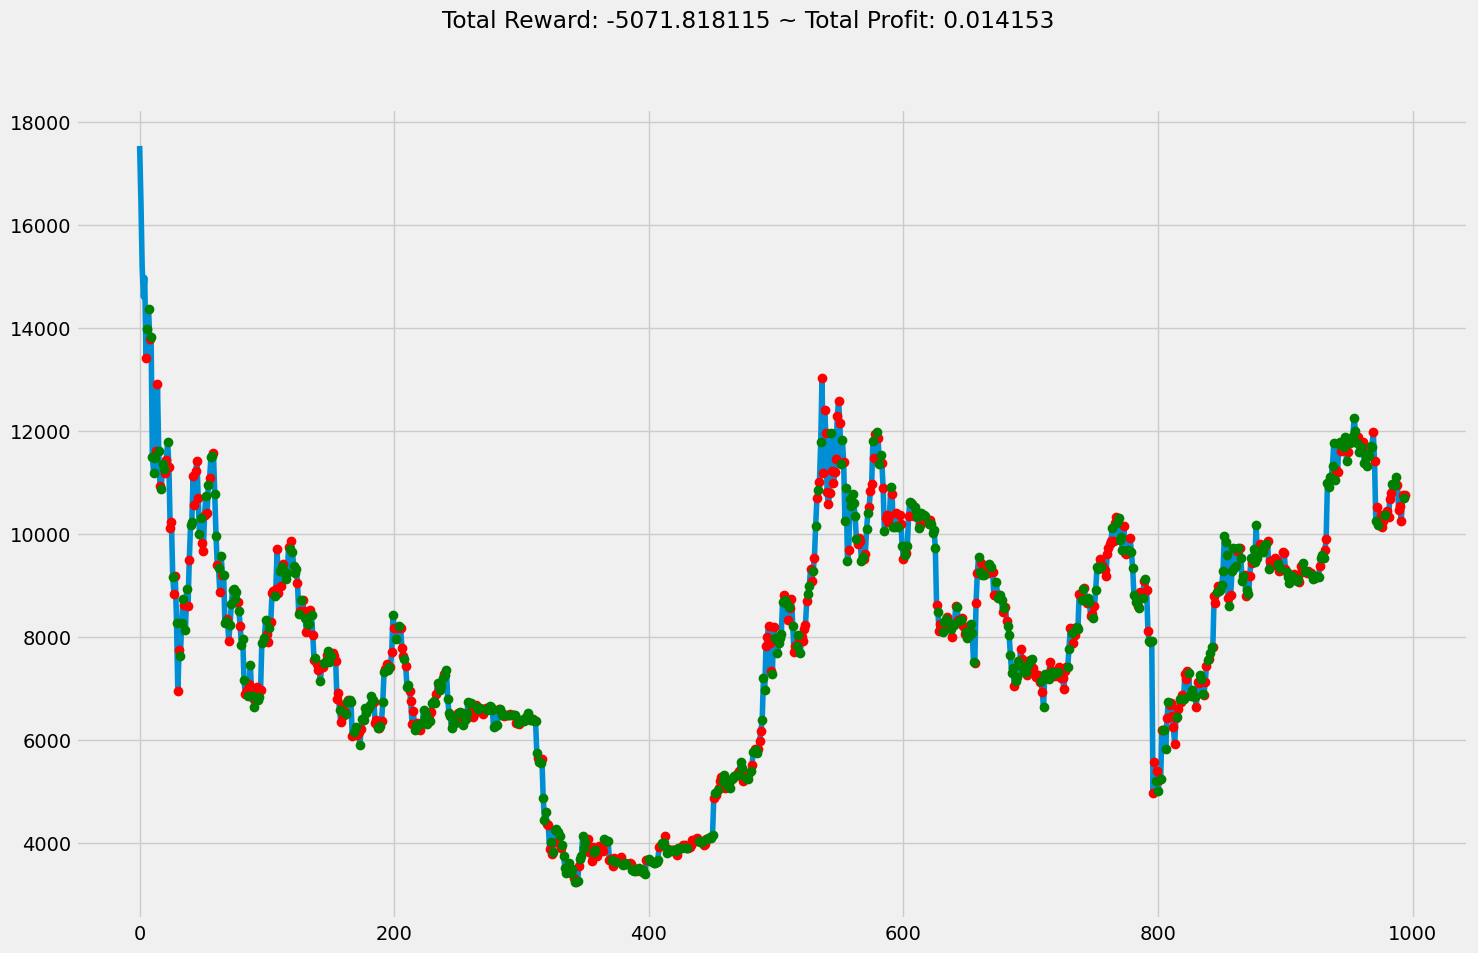

In [ ]:
#setting the initial state for the env. (windows)
state = env.reset()
while True:
  #creating random steps by accessing the possible actions provided by the stock-v0 env via 'env.action_space' and storing it in the 'action' variable
  #There are usually / by default only 2 actions that can occur in the stock environment, which is 'buy' or 'sell' -> Discrete(2)
  #https://github.com/AminHP/gym-anytrading
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info", info)
    break

#visualizing the environment via matplotlib
plt.figure(figsize=(16,10))
plt.cla()
env.render_all()
plt.show()

# 3. Build Environment and Train

In [ ]:
#creating a new RL environment but this time adding the lambda function in order for us to loopn through different env settings if needed
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(10,1000), window_size=5)
#adding teh new env. into the dummy algo and assigning it to the variable ='env'
env = DummyVecEnv([env_maker])

NameError: ignored

In [ ]:
#adding the A2C algorithm to the model for the run of this env.
#https://stable-baselines.readthedocs.io/en/master/modules/a2c.html

model = A2C("MlpLstmPolicy", env, verbose=1)
model.learn(total_timesteps=25000)

NameError: ignored

# Plan B Transformer Approach 1

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer

# Load and preprocess data
stock_data = yf.download("AAPL", start="2020-01-01", end="2023-04-13")
returns = np.log(stock_data['Adj Close']/stock_data['Adj Close'].shift(1))
returns.dropna(inplace=True)

# Load and preprocess labeled data
labeled_data = df
texts = [str(return_) for return_ in returns]
labels = df['Close'].values

# Tokenize data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_texts = tokenizer(texts, padding=True, truncation=True, return_tensors="tf")

# Define model architecture
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compile and fit model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss=model.compute_loss)
model.fit(x=encoded_texts, y=labels, batch_size=32, epochs=3)

[*********************100%***********************]  1 of 1 completed


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: ignored